### Importing & Loading what we need 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score

# Loading our dataset
data = pd.read_csv('EExpanded_Biometric_Static_New.csv')


In [2]:
data.head()

,Club,Player Name,Position,Status,Resting Heart Rate (bpm),Max Heart Rate (bpm),HRV (ms),VO2 Max (ml/kg/min),Weight (kg),Reaction Time (ms),...,Injury Frequency,Recovery Time (weeks),Training Hours,Heart Rate Zone,Fatigue Score,Injury Risk,Readiness Score,Player ID,League,Team
0,Manchester City,Player_Man_1,Defender,Recovering,64,200,53.390730,41.937003,73.374983,319.994983,...,3,7,5.282058,Zone 1 (Rest),84.914782,3.545937,5.206476,1,Premier League,Manchester City
1,Manchester City,Player_Man_3,Defender,Optimal,63,152,94.397616,43.606151,86.262481,201.326496,...,0,0,18.083973,Zone 1 (Rest),49.342267,0.000000,58.329934,3,Premier League,Manchester City
2,Manchester City,Player_Man_4,Forward,Optimal,51,169,69.641019,53.665270,78.299900,283.319491,...,0,0,12.587800,Zone 1 (Rest),55.991906,0.000000,39.830996,4,Premier League,Manchester City
3,Manchester City,Player_Man_5,Midfielder,Recovering,63,195,36.238250,41.354007,75.782832,468.456955,...,2,5,7.989500,Zone 1 (Rest),47.310223,2.417749,15.529248,5,Premier League,Manchester City
4,Manchester City,Player_Man_6,Midfielder,Optimal,63,172,80.833370,49.223440,82.113346,274.732011,...,0,0,13.567533,Zone 1 (Rest),70.486062,0.000000,34.634156,6,Premier League,Manchester City


### Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Club                        1408 non-null   object 
 1   Player Name                 1408 non-null   object 
 2   Position                    1408 non-null   object 
 3   Status                      1408 non-null   object 
 4   Resting Heart Rate (bpm)    1408 non-null   int64  
 5   Max Heart Rate (bpm)        1408 non-null   int64  
 6   HRV (ms)                    1408 non-null   float64
 7   VO2 Max (ml/kg/min)         1408 non-null   float64
 8   Weight (kg)                 1408 non-null   float64
 9   Reaction Time (ms)          1408 non-null   float64
 10  Match Consistency Variance  1408 non-null   float64
 11  Minutes Played              1408 non-null   int64  
 12  Injury Frequency            1408 non-null   int64  
 13  Recovery Time (weeks)       1408 

In [4]:
data = data.drop(columns = ['Club', 'Player Name','Player ID','Team', 'League'])

In [5]:
data.head()

,Position,Status,Resting Heart Rate (bpm),Max Heart Rate (bpm),HRV (ms),VO2 Max (ml/kg/min),Weight (kg),Reaction Time (ms),Match Consistency Variance,Minutes Played,Injury Frequency,Recovery Time (weeks),Training Hours,Heart Rate Zone,Fatigue Score,Injury Risk,Readiness Score
0,Defender,Recovering,64,200,53.390730,41.937003,73.374983,319.994983,0.959249,1896,3,7,5.282058,Zone 1 (Rest),84.914782,3.545937,5.206476
1,Defender,Optimal,63,152,94.397616,43.606151,86.262481,201.326496,0.476881,2013,0,0,18.083973,Zone 1 (Rest),49.342267,0.000000,58.329934
2,Forward,Optimal,51,169,69.641019,53.665270,78.299900,283.319491,0.169346,2080,0,0,12.587800,Zone 1 (Rest),55.991906,0.000000,39.830996
3,Midfielder,Recovering,63,195,36.238250,41.354007,75.782832,468.456955,0.949754,701,2,5,7.989500,Zone 1 (Rest),47.310223,2.417749,15.529248
4,Midfielder,Optimal,63,172,80.833370,49.223440,82.113346,274.732011,0.315877,2791,0,0,13.567533,Zone 1 (Rest),70.486062,0.000000,34.634156


In [6]:
# Distribution of target Variable
print("\nDistribution of 'Position' variable:")
print(data['Status'].value_counts())


Distribution of 'Position' variable:
Status
Optimal            563
At Risk            421
Recovering         308
Underperforming    116
Name: count, dtype: int64


/var/folders/hf/d6jmgkz95db_yxgvdcsq9fxw0000gn/T/ipykernel_2530/1163949249.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=data, palette="Set2")


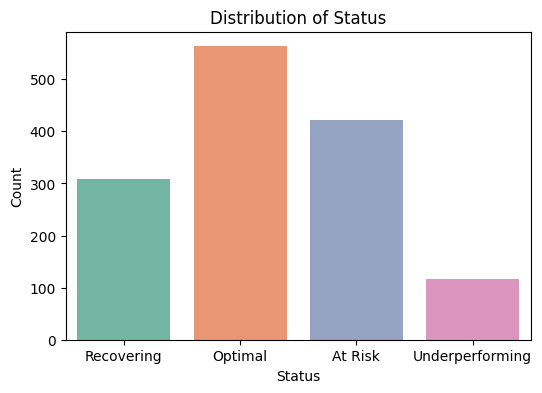

In [7]:
# Visualizing the distribution of the target variable (Parkinson's Status)
plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=data, palette="Set2")
plt.title('Distribution of Status')
plt.ylabel('Count')
plt.show()

In [8]:
# List of numerical features to analyze
numerical_features = [
    "Resting Heart Rate (bpm)",
    "Max Heart Rate (bpm)",
    "HRV (ms)",
    "VO2 Max (ml/kg/min)",
    "Weight (kg)",
    "Reaction Time (ms)",
    "Match Consistency Variance",
    "Minutes Played",
    "Injury Frequency",
    "Recovery Time (weeks)",
    "Training Hours",
    "Fatigue Score",
    "Injury Risk",
    "Readiness Score"
]

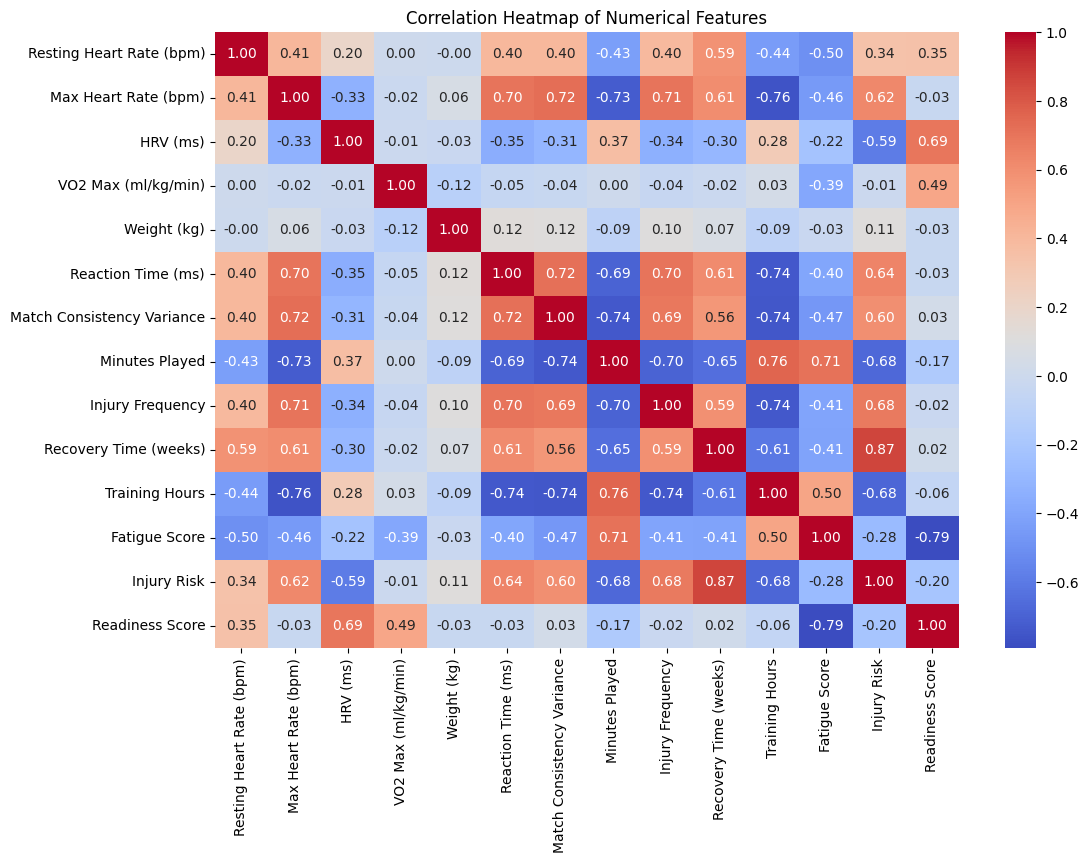

In [9]:
plt.figure(figsize=(12, 8))
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

In [10]:
# Initialize a dictionary to store LabelEncoders for each categorical column
label_encoders = {}

# List of categorical columns to encode
categorical_columns = ['Position', 'Status','Heart Rate Zone']

# Encode each categorical column
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])  # Transform categorical values into numeric
    label_encoders[col] = le  # Save the encoder for later use

In [11]:
# Drop irrelevant columns and separate the target column ('Status')
X = data[['Fatigue Score', 'Injury Risk','Readiness Score']]
y = data['Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


SVC - Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        74
           1       1.00      1.00      1.00       112
           2       0.90      0.95      0.93        66
           3       1.00      0.87      0.93        30

    accuracy                           0.96       282
   macro avg       0.96      0.94      0.95       282
weighted avg       0.96      0.96      0.96       282



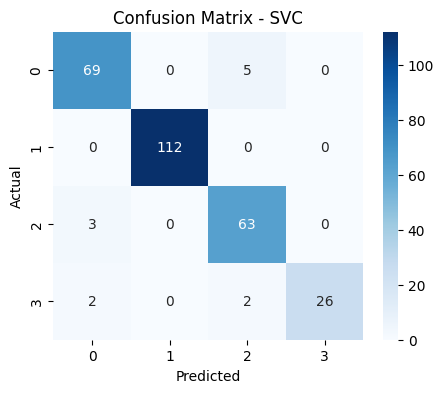


KNN - Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        74
           1       0.99      1.00      1.00       112
           2       0.88      0.89      0.89        66
           3       0.97      0.97      0.97        30

    accuracy                           0.94       282
   macro avg       0.94      0.93      0.93       282
weighted avg       0.94      0.94      0.94       282



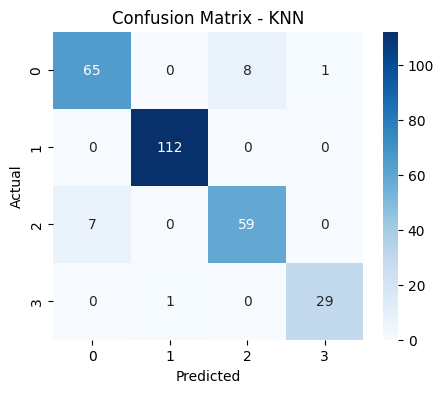


RandomForest - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       1.00      1.00      1.00       112
           2       0.97      1.00      0.99        66
           3       1.00      1.00      1.00        30

    accuracy                           0.99       282
   macro avg       0.99      0.99      0.99       282
weighted avg       0.99      0.99      0.99       282



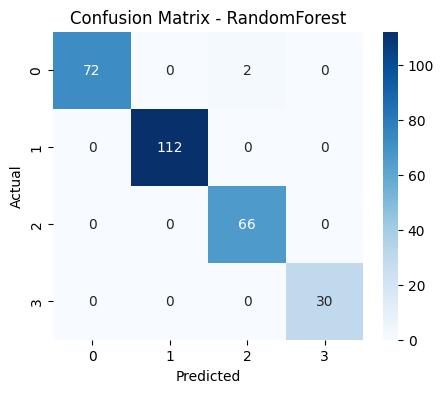

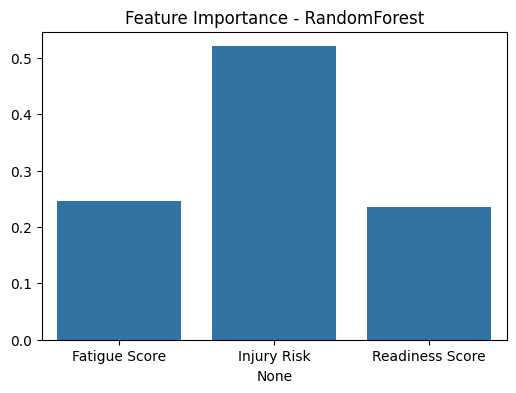


LogisticRegression - Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89        74
           1       0.97      1.00      0.99       112
           2       0.86      0.89      0.87        66
           3       1.00      0.77      0.87        30

    accuracy                           0.92       282
   macro avg       0.93      0.89      0.90       282
weighted avg       0.92      0.92      0.92       282



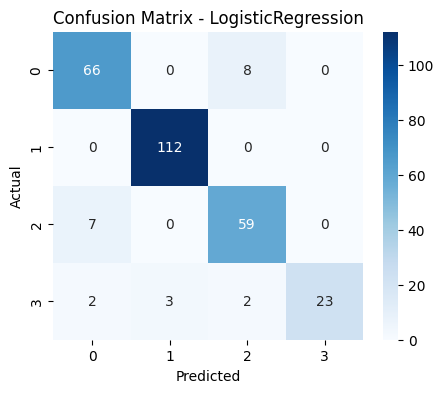


DecisionTree - Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       1.00      1.00      1.00       112
           2       0.97      0.98      0.98        66
           3       0.97      1.00      0.98        30

    accuracy                           0.99       282
   macro avg       0.98      0.99      0.99       282
weighted avg       0.99      0.99      0.99       282



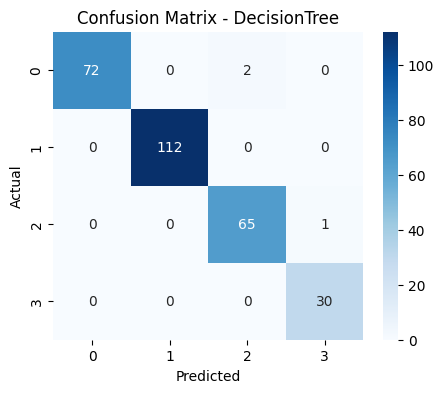

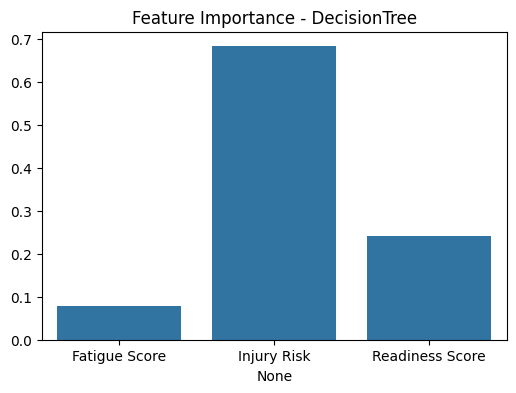


GaussianNB - Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88        74
           1       1.00      1.00      1.00       112
           2       0.81      0.89      0.85        66
           3       1.00      0.77      0.87        30

    accuracy                           0.92       282
   macro avg       0.92      0.88      0.90       282
weighted avg       0.92      0.92      0.92       282



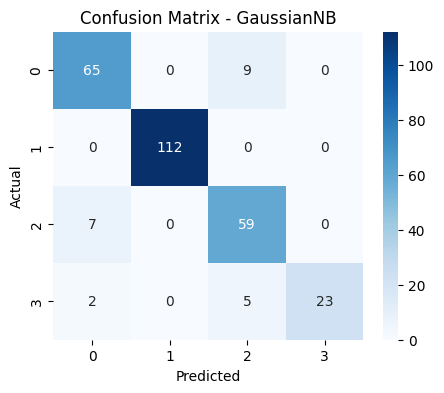


Model Performance Summary:
                Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0                 SVC  0.957447   0.958865  0.957447  0.957462  0.993775
1                 KNN  0.939716   0.939482  0.939716  0.939536  0.994664
2        RandomForest  0.992908   0.993116  0.992908  0.992912  0.997100
3  LogisticRegression  0.921986   0.924231  0.921986  0.921289  0.992737
4        DecisionTree  0.989362   0.989582  0.989362  0.989382  0.993074
5          GaussianNB  0.918440   0.923200  0.918440  0.918676  0.986760


In [12]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models and hyperparameters
grid_params = {
    'SVC': (SVC(probability=True), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}),
    'KNN': (KNeighborsClassifier(), {'n_neighbors': [3, 5, 7]}),
    'RandomForest': (RandomForestClassifier(random_state=2), {'n_estimators': [50, 100, 200]}),
    'LogisticRegression': (LogisticRegression(max_iter=1000), {'C': [0.1, 1, 10]}),
    'DecisionTree': (DecisionTreeClassifier(), {'max_depth': [5, 10, None]}),
    'GaussianNB': (GaussianNB(), {})
}

# Train, tune, and evaluate models
results = []
for name, (model, params) in grid_params.items():
    grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    
    y_pred = best_model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, best_model.predict_proba(X_test), multi_class='ovr') if hasattr(best_model, 'predict_proba') else 'N/A'
    
    results.append([name, accuracy, precision, recall, f1, roc_auc])
    
    print(f"\n{name} - Classification Report:\n", classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # Feature importance (only for tree-based models)
    if hasattr(best_model, 'feature_importances_'):
        feature_importance = best_model.feature_importances_
        plt.figure(figsize=(6, 4))
        sns.barplot(x=X.columns, y=feature_importance)
        plt.title(f'Feature Importance - {name}')
        plt.show()

# Display summary results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC'])
print("\nModel Performance Summary:")
print(results_df)

/var/folders/hf/d6jmgkz95db_yxgvdcsq9fxw0000gn/T/ipykernel_1268/2260436014.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(comparison.index, rotation=45)
/var/folders/hf/d6jmgkz95db_yxgvdcsq9fxw0000gn/T/ipykernel_1268/2260436014.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(comparison.index, rotation=45)
/var/folders/hf/d6jmgkz95db_yxgvdcsq9fxw0000gn/T/ipykernel_1268/2260436014.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(comparison.index, rotation=45)
/var/folders/hf/d6jmgkz95db_yxgvdcsq9fxw0000gn/T/ipykernel_1268/2260436014.py:36: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fix

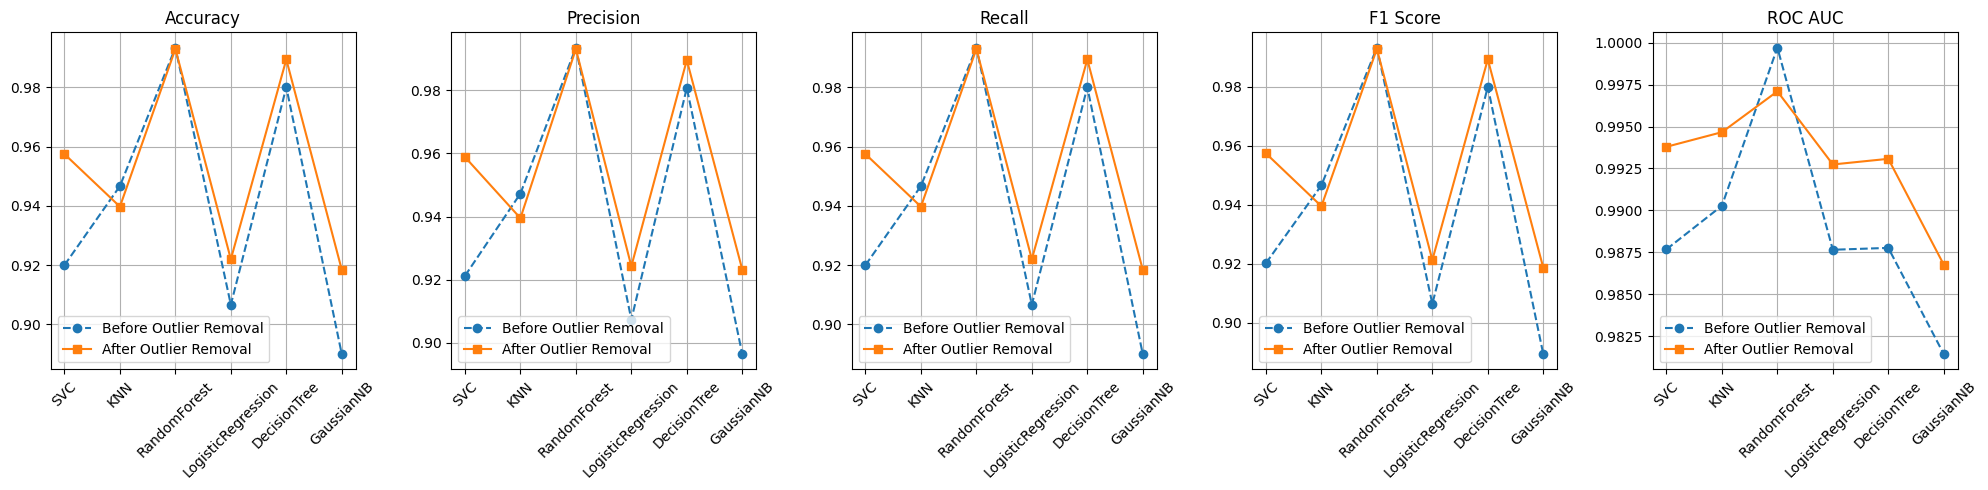

                    Accuracy_Before  Precision_Before  Recall_Before  \
Model                                                                  
SVC                        0.920000          0.921204       0.920000   
KNN                        0.946667          0.947285       0.946667   
RandomForest               0.993333          0.993527       0.993333   
LogisticRegression         0.906667          0.907339       0.906667   
DecisionTree               0.980000          0.980780       0.980000   
GaussianNB                 0.890000          0.896403       0.890000   

                    F1 Score_Before  ROC AUC_Before  Accuracy_After  \
Model                                                                 
SVC                        0.920212        0.987675        0.957447   
KNN                        0.946647        0.990274        0.939716   
RandomForest               0.993344        0.999707        0.992908   
LogisticRegression         0.906421        0.987648        0.921986 

In [88]:
# Re-import necessary libraries since execution state was reset
import pandas as pd
import matplotlib.pyplot as plt

# Before outlier removal performance
before_outliers = pd.DataFrame({
    "Model": ["SVC", "KNN", "RandomForest", "LogisticRegression", "DecisionTree", "GaussianNB"],
    "Accuracy": [0.920000, 0.946667, 0.993333, 0.906667, 0.980000, 0.890000],
    "Precision": [0.921204, 0.947285, 0.993527, 0.907339, 0.980780, 0.896403],
    "Recall": [0.920000, 0.946667, 0.993333, 0.906667, 0.980000, 0.890000],
    "F1 Score": [0.920212, 0.946647, 0.993344, 0.906421, 0.980057, 0.889359],
    "ROC AUC": [0.987675, 0.990274, 0.999707, 0.987648, 0.987760, 0.981422]
})

# After outlier removal performance
after_outliers = pd.DataFrame({
    "Model": ["SVC", "KNN", "RandomForest", "LogisticRegression", "DecisionTree", "GaussianNB"],
    "Accuracy": [0.957447, 0.939716, 0.992908, 0.921986, 0.989362, 0.918440],
    "Precision": [0.958865, 0.939482, 0.993116, 0.924231, 0.989582, 0.923200],
    "Recall": [0.957447, 0.939716, 0.992908, 0.921986, 0.989362, 0.918440],
    "F1 Score": [0.957462, 0.939536, 0.992912, 0.921289, 0.989382, 0.918676],
    "ROC AUC": [0.993792, 0.994664, 0.997100, 0.992737, 0.993074, 0.986760]
})

# Merging the data for comparison
comparison = before_outliers.set_index("Model").join(after_outliers.set_index("Model"), lsuffix="_Before", rsuffix="_After")

# Plot performance comparison
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"]
fig, axes = plt.subplots(nrows=1, ncols=len(metrics), figsize=(20, 5))

for i, metric in enumerate(metrics):
    axes[i].plot(comparison.index, comparison[f"{metric}_Before"], label="Before Outlier Removal", marker="o", linestyle="--")
    axes[i].plot(comparison.index, comparison[f"{metric}_After"], label="After Outlier Removal", marker="s", linestyle="-")
    axes[i].set_title(metric)
    axes[i].set_xticklabels(comparison.index, rotation=45)
    axes[i].legend()
    axes[i].grid()

plt.tight_layout()
plt.show()

# Show performance change summary
print(comparison)
